# STEP 0

## 0.1. Imports


In [2]:
import pandas                   as pd
import seaborn                  as sns
import sweetviz                 as sv
import matplotlib.pyplot        as plt
import seaborn                  as sns
# from sklearn.svm                import SVC 
# from sklearn                    import metrics
# from sklearn.pipeline           import Pipeline
# from sklearn.model_selection    import GridSearchCV
# from sklearn.impute             import SimpleImputer
# from sklearn.model_selection    import cross_validate
# from sklearn.model_selection    import train_test_split
# from sklearn.compose            import ColumnTransformer
# from sklearn.model_selection    import StratifiedKFold, KFold
# from sklearn.linear_model       import LogisticRegression, LinearRegression
# from sklearn.preprocessing      import MinMaxScaler, RobustScaler, StandardScaler
# from sklearn.preprocessing      import LabelEncoder, OneHotEncoder, OrdinalEncoder

c:\Users\Usuário\repos\google_ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0.2. Helper Functions

In [3]:
# ===================================================================
# Configura os gráficos
def jupyter_settings():
    %matplotlib inline
    # %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [22, 9]
    plt.rcParams['font.size'] = 21

    # display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    # configura o pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()

jupyter_settings()


# # Faz o Cross Validation do modelo e retorna um dataframe com as métricas selecionadas
# def kfold_cross_validation(model, model_name, x, y, n_folds=3):
#     kf = StratifiedKFold(n_splits=n_folds)    
#     y = y.values
#     x = x.values
    
#     for train, test in kf.split(x, y):
#         data_train, target_train = x[train], y[train]
#         data_test, target_test   = x[test], y[test]
        
#         # Balanceando as classes
#         from imblearn.combine import SMOTETomek
#         smote_tomek = SMOTETomek(random_state=0)
#         data_train, target_train = smote_tomek.fit_resample(data_train, target_train)

#         # Aplicando scaler
#         mms = MinMaxScaler()
#         mms.fit(data_train)
#         data_train_norm = mms.transform(data_train)
#         data_test_norm = mms.transform(data_test)

#         model = model.fit(data_train_norm, target_train)
#         out = model.predict(data_test_norm)
        
#     data = [
#             [
#                 model_name,
#                 metrics.precision_score(target_test, out),
#                 metrics.recall_score(target_test, out),
#                 metrics.f1_score(target_test, out),
#                 metrics.roc_auc_score(target_test, out),
#             ]
#         ]
    
#     columns = ["Model", "Precision", "Recall", "F1", "AUC"]
#     metrics_table = pd.DataFrame(data, columns=columns)

#     # Confusion matrix
#     confusion = pd.crosstab(target_test, out, rownames=['Real'], colnames=['Predict'])
#     sns.heatmap(confusion, annot=True, fmt='g');

#     return metrics_table

# # Calcula e retorna um dataframe com as métricas sem validação cruzada
# def simple_metrics(model_name, test, predict):
#     data = [
#         [
#             model_name,
#             metrics.precision_score(test, predict),
#             metrics.recall_score(test, predict),
#             metrics.f1_score(test, predict),
#             metrics.roc_auc_score(test, predict),
#         ]
#     ]
#     columns = ["Model", "Precision", "Recall", "F1", "AUC"]
#     metrics_table = pd.DataFrame(data, columns=columns)
#     return metrics_table


# def tuning_hyperparams(pre_processor, modelo, model_name, param, X, y):
#     '''
#         Método que utiliza o Pipeline para pré processar os dados e calcula quais são 
#         os melhores hiperparâmetros baseado no modelo e no dicionário de hiperparâmetros 
#         informados. Retorna um dicionário com os parâmetros testados e os melhores valores
#         de cada um.

#         pre_processor: objeto da classe ColumnTransformer escolhido para os dados
#         modelo: instância do algoritimo a ser usado
#         model_name: String com o apelido do modelo a ser usado
#         param: Dict - dicionário com os hiperparams e os valores a serem testados
#         X: dados de treino
#         y: variável target dos dados de treino

#         return dict
#     '''
#     # criando o modelo usando pipeline
#     model = Pipeline(
#         steps=[
#             ("preprocessor", pre_processor),
#             (model_name, modelo),
#         ]
#     )

#     # Criando o dicionario de hiperparâmetros
#     test_keys = [model_name + '__' + x for x in param.keys()] # colocar duplo underscore entre o nome do modelo e o nome do parâmetro  (lr__)
#     test_values = list(param.values())
#     parameters = { test_keys[i]: test_values[i] for i in range(len(test_keys)) }

#     # Rodando 5-fold cross-validation com gridsearch
#     kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#     grid = GridSearchCV(
#         model, param_grid=parameters, cv=kfold, n_jobs=-1, return_train_score=True
#     )

#     grid.fit(X=X, y=y)

#     # Imprime os melhores parâmetros
#     param = grid.best_params_
#     return param

## 0.3. Loading Data

In [4]:
test_raw = pd.read_csv('../data/test.csv')
train_raw = pd.read_csv('../data/train.csv')

# 1 - Data understanding


In [9]:
df = train_raw.copy()
df.head(3)

id_do_caso continente educacao_do_empregado tem_experiencia_de_trabalho requer_treinamento_de_trabalho  num_de_empregados  ano_de_estabelecimento regiao_de_emprego  salario_prevalecente unidade_de_salario posicao_em_tempo_integral status_do_caso
0  EZYV10567     Europa          Ensino Médio                           N                              S               2087                    1855               Sul              69711.24                Ano                         S         Negado
1   EZYV5505       Ásia              Mestrado                           S                              N               5991                    2003        Meio-Oeste              52931.38                Ano                         S       Aprovado
2   EZYV5207       Ásia          Ensino Médio                           N                              N               1426                    2000              Ilha             110830.21                Ano                         S         Negado

## 1.1. Rename Columns

In [11]:
df.columns = ['id', 'continente', 'escolaridade',
       'tem_experiencia', 'requer_treinamento',
       'num_empregados', 'ano_fundacao', 'regiao',
       'salario_medio', 'periodicidade',
       'tempo_integral', 'status']

## 1.2. Data Dimensions

In [13]:
# Conferindo a volumetria
print(f"Quantidade de linhas:   {df.shape[0]}")
print(f"Quantidade de colunas:  {df.shape[1]}")
print(f"IDs únicos:             {df.id.nunique()}\n")

Quantidade de linhas:   17836
Quantidade de colunas:  12
IDs únicos:             17836



## 1.3. Data Types

In [21]:
df.dtypes

id                      object
continente            category
escolaridade          category
tem_experiencia       category
requer_treinamento    category
num_empregados           int32
ano_fundacao             int32
regiao                category
salario_medio          float32
periodicidade         category
tempo_integral        category
status                category
dtype: object

## 1.4. Change Data Types

In [17]:
'''
Alterando os tipos de int64 e float64 para int32 e float32 respectivamente com o 
intuito de melhorar a performance além de alterar as variáveis nominais para o tipo 
category que consome menos memória que o tipo object.
'''
df.id = df.id.astype('str')
df.continente = df.continente.astype('category')
df.escolaridade = df.escolaridade.astype('category')
df.tem_experiencia = df.tem_experiencia.astype('category')
df.requer_treinamento = df.requer_treinamento.astype('category')
df.num_empregados = df.num_empregados.astype('int32')
df.ano_fundacao = df.ano_fundacao.astype('int32')
df.regiao = df.regiao.astype('category')
df.salario_medio = df.salario_medio.astype('float32')
df.periodicidade = df.periodicidade.astype('category')
df.tempo_integral = df.tempo_integral.astype('category')
df.status = df.status.astype('category')


## 1.5. Check NA


In [20]:
df.isnull().mean()

id                   0.00
continente           0.00
escolaridade         0.00
tem_experiencia      0.00
requer_treinamento   0.00
num_empregados       0.00
ano_fundacao         0.00
regiao               0.00
salario_medio        0.00
periodicidade        0.00
tempo_integral       0.00
status               0.00
dtype: float64

## 1.6. Descriptive Statistical


In [23]:
# Separando os atributos entre numéricos e categóricos
numerical_attributes = df.select_dtypes(include=['int32', 'float32'])
categorical_attributes = df.select_dtypes(exclude=['int32', 'float32'])

### 1.6.1 Numerical Features

In [24]:
numerical_attributes.describe().T

count     mean      std     min      25%      50%       75%       max
num_empregados 17836.00  5726.50 23321.38  -26.00  1023.00  2117.00   3504.25 602069.00
ano_fundacao   17836.00  1979.49    42.10 1800.00  1976.00  1997.00   2005.00   2016.00
salario_medio  17836.00 74327.42 52795.86    2.14 33892.91 70106.92 107564.71 319210.28

### 1.6.2 Categorical Features

In [25]:
display( pd.DataFrame( categorical_attributes.apply(lambda x: x.unique().shape[0]), columns=[ 'Valores únicos'], ).sort_values('Valores únicos'))

Valores únicos
tem_experiencia                  2
requer_treinamento               2
tempo_integral                   2
status                           2
escolaridade                     4
periodicidade                    4
regiao                           5
continente                       6
id                           17836

### 1.7 Target Feature

In [26]:
df.status.value_counts()

status
Aprovado    11937
Negado       5899
Name: count, dtype: int64

# 2 - Exploratory data analisys

In [89]:
my_report = sv.analyze(df2, target_feat ='y')
my_report.show_html()

c:\Users\Usuário\repos\compass\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\Usuário\repos\compass\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: y (TARGET)                          |▏         | [  1%]   00:00 -> (00:04 left)c:\Users\Usuário\repos\compass\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
Feature: id                                  |▎         | [  3%]   00:00 -> (00:15 left)c:\Users\Usuário\repos\compass\lib\site-packages\swee

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 2.1. Análise Univariada

Variáveis contínuas não afetudas pelos valores marcadores (-999)


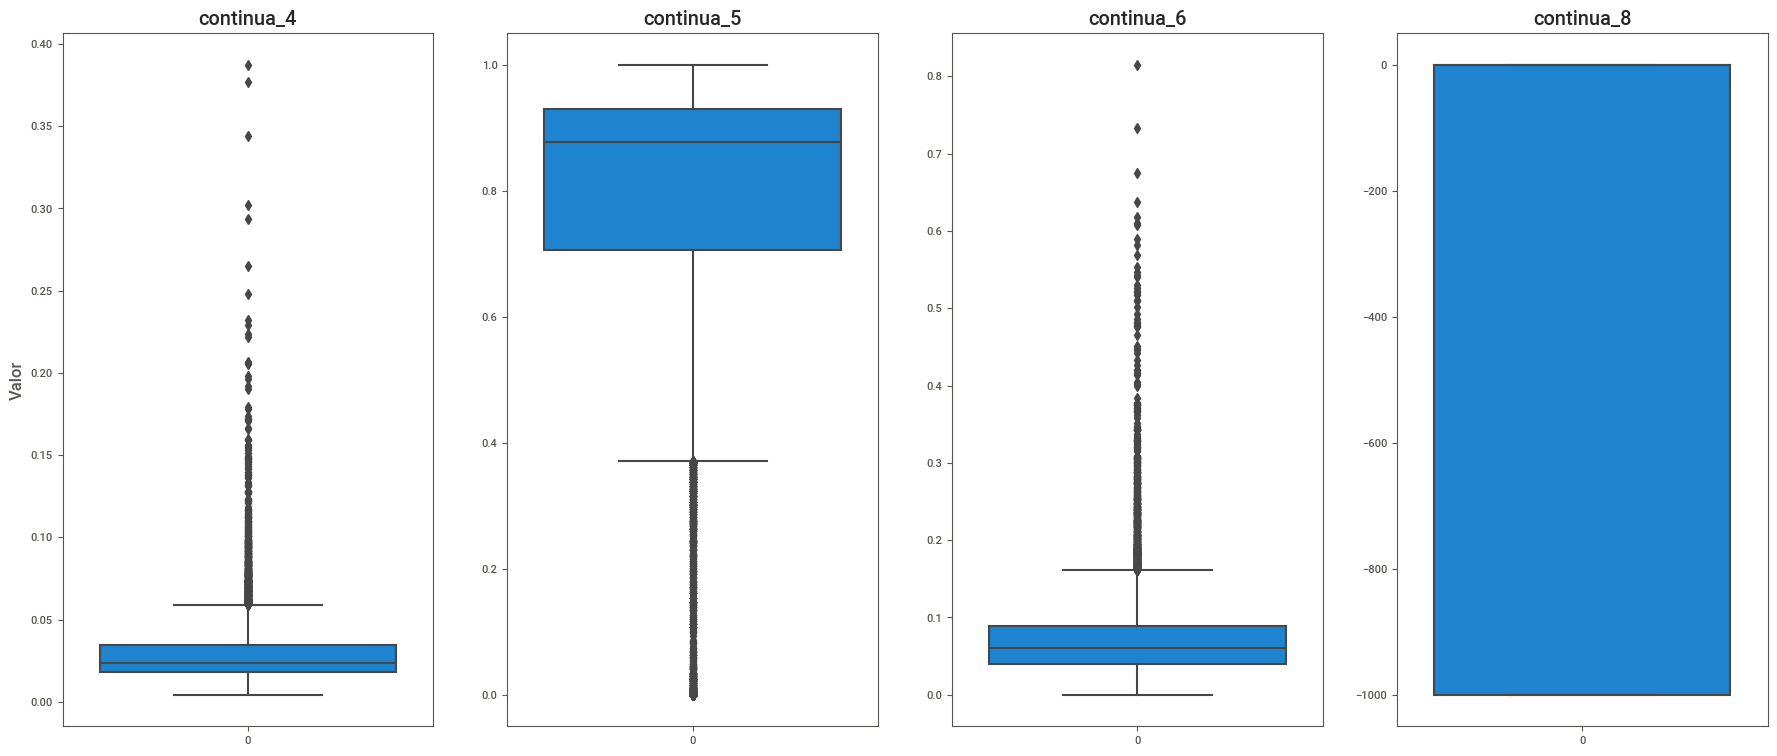

In [90]:
plt.subplot(1,4,1)
sns.boxplot(numerical_attributes['continua_4']).set(title='continua_4', ylabel="Valor")

plt.subplot(1,4,2)
sns.boxplot(numerical_attributes['continua_5']).set(title='continua_5',)

plt.subplot(1,4,3)
sns.boxplot(numerical_attributes['continua_6']).set(title='continua_6')

plt.subplot(1,4,4)
sns.boxplot(numerical_attributes['continua_8']).set(title='continua_8',);

print("Variáveis contínuas não afetudas pelos valores marcadores (-999)")

Variáveis contínuas afetadas pelos valores marcadores (-999)


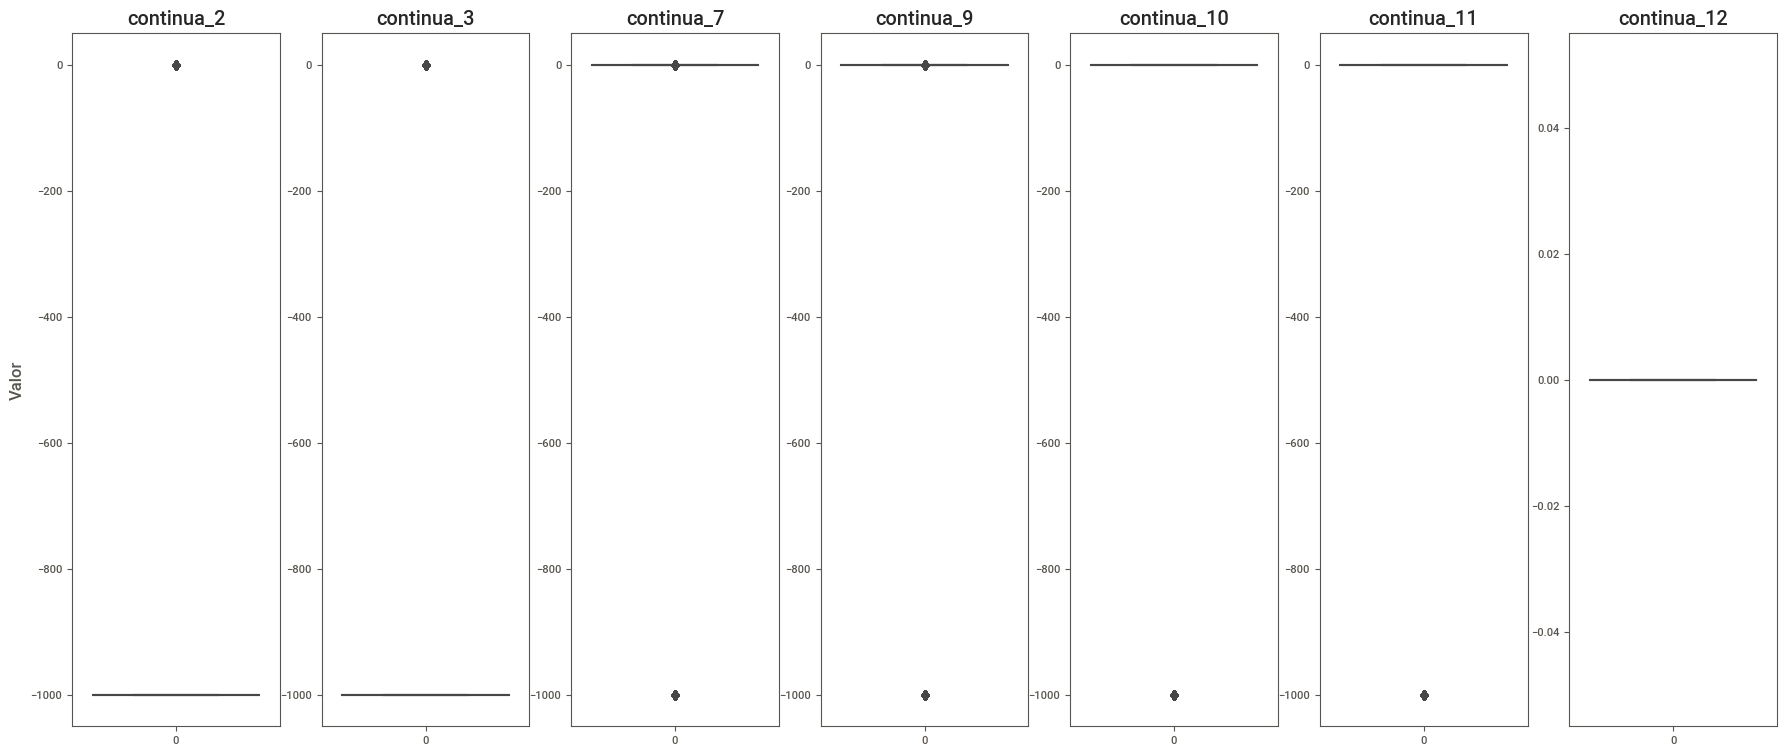

In [91]:
plt.subplot(1,7,1)
sns.boxplot(numerical_attributes['continua_2']).set(title='continua_2', ylabel="Valor")

plt.subplot(1,7,2)
sns.boxplot(numerical_attributes['continua_3']).set(title='continua_3')

plt.subplot(1,7,3)
sns.boxplot(numerical_attributes['continua_7']).set(title='continua_7')

plt.subplot(1,7,4)
sns.boxplot(numerical_attributes['continua_9']).set(title='continua_9')

plt.subplot(1,7,5)
sns.boxplot(numerical_attributes['continua_10']).set(title='continua_10')

plt.subplot(1,7,6)
sns.boxplot(numerical_attributes['continua_11']).set(title='continua_11')

plt.subplot(1,7,7)
sns.boxplot(numerical_attributes['continua_12']).set(title='continua_12');

print("Variáveis contínuas afetadas pelos valores marcadores (-999)")

Variáveis contínuas afetadas sem os valores marcadores (-999)


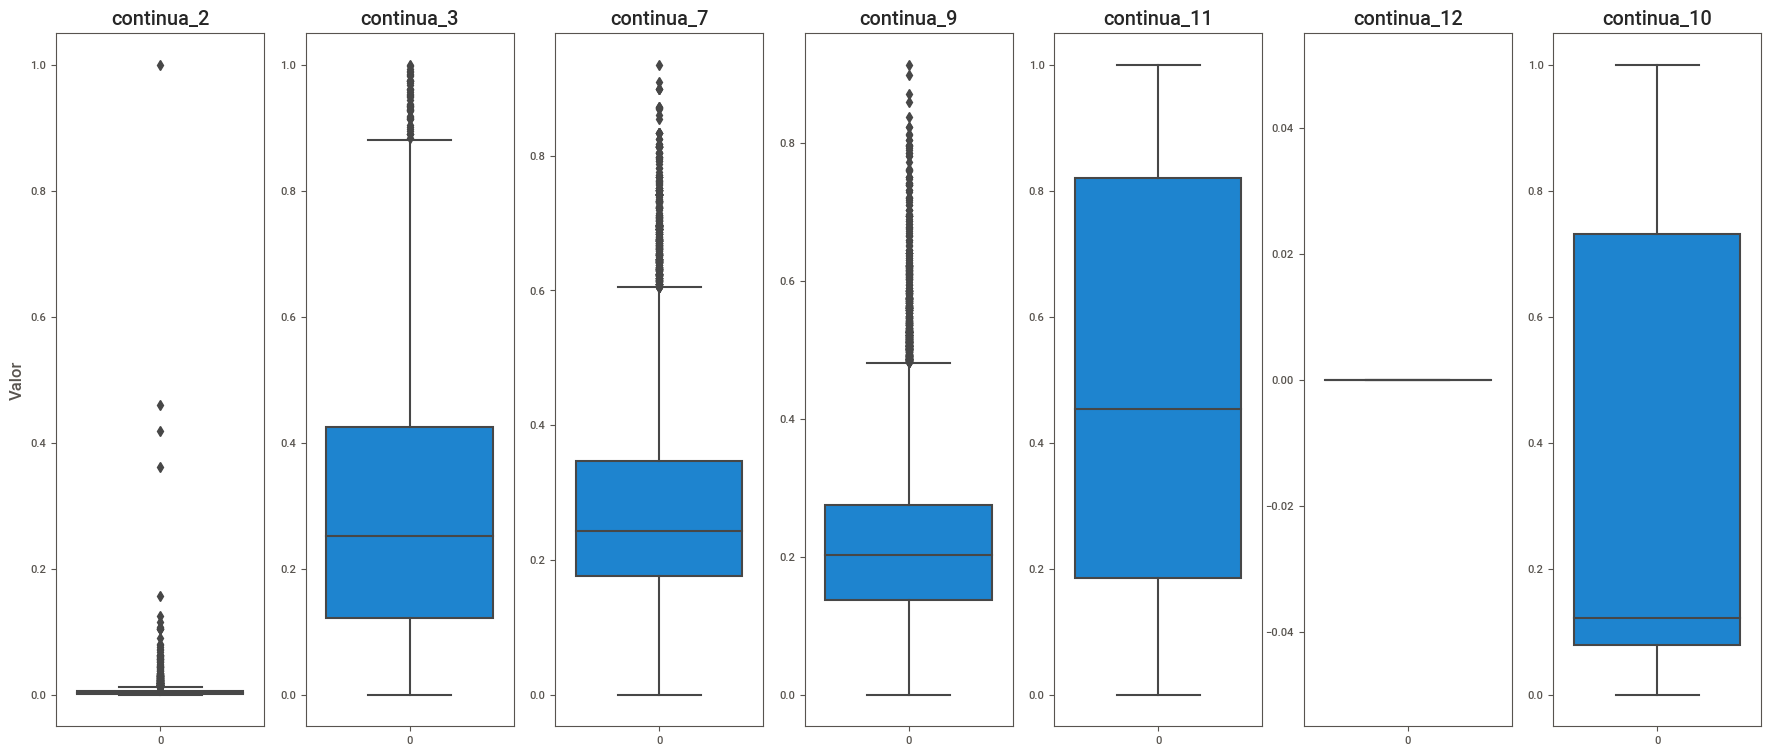

In [92]:
plt.subplot(1,7,1)
sns.boxplot(numerical_attributes[numerical_attributes['continua_2'] > -1]['continua_2']).set(title='continua_2', ylabel="Valor")

plt.subplot(1,7,2)
sns.boxplot(numerical_attributes[numerical_attributes['continua_3'] > -1]['continua_3']).set(title='continua_3')

plt.subplot(1,7,3)
sns.boxplot(numerical_attributes[numerical_attributes['continua_7'] > -1]['continua_7']).set(title='continua_7')

plt.subplot(1,7,4)
sns.boxplot(numerical_attributes[numerical_attributes['continua_9'] > -1]['continua_9']).set(title='continua_9')

plt.subplot(1,7,5)
sns.boxplot(numerical_attributes[numerical_attributes['continua_11'] > -1]['continua_11']).set(title='continua_11')

plt.subplot(1,7,6)
sns.boxplot(numerical_attributes[numerical_attributes['continua_12'] > -1]['continua_12']).set(title='continua_12')

plt.subplot(1,7,7)
sns.boxplot(numerical_attributes[numerical_attributes['continua_10'] > -1]['continua_10']).set(title='continua_10');

print('Variáveis contínuas afetadas sem os valores marcadores (-999)')

Variáveis discretas não afetadas pelos valores marcadores (-999)


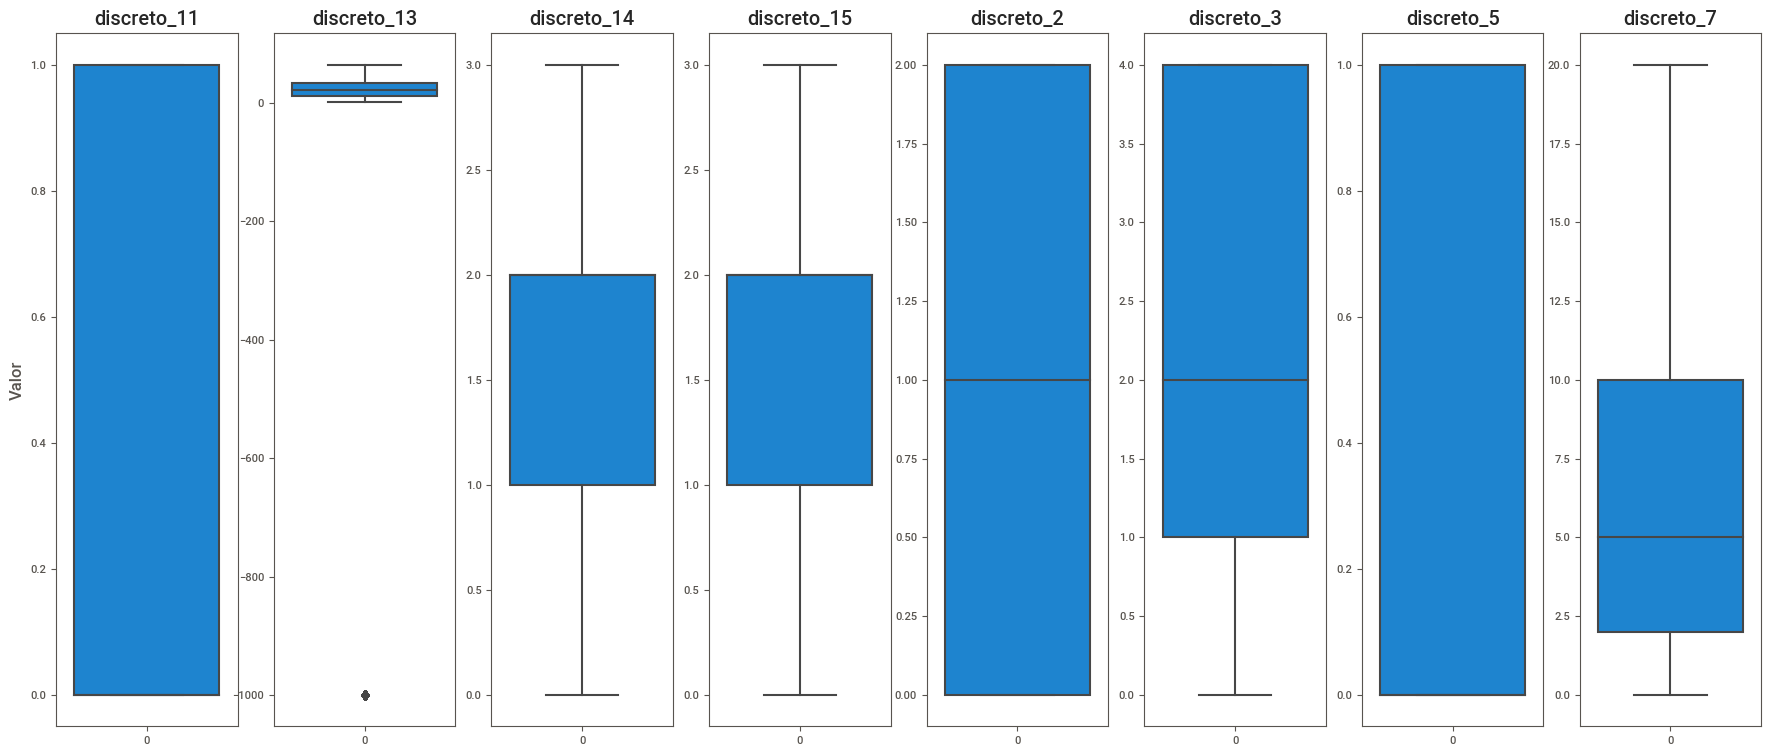

In [93]:
plt.subplot(1,8,1)
sns.boxplot(numerical_attributes['discreto_11']).set(title='discreto_11', ylabel="Valor")

plt.subplot(1,8,2)
sns.boxplot(numerical_attributes['discreto_13']).set(title='discreto_13')

plt.subplot(1,8,3)
sns.boxplot(numerical_attributes['discreto_14']).set(title='discreto_14')

plt.subplot(1,8,4)
sns.boxplot(numerical_attributes['discreto_15']).set(title='discreto_15')

plt.subplot(1,8,5)
sns.boxplot(numerical_attributes['discreto_2']).set(title='discreto_2')

plt.subplot(1,8,6)
sns.boxplot(numerical_attributes['discreto_3']).set(title='discreto_3')

plt.subplot(1,8,7)
sns.boxplot(numerical_attributes['discreto_5']).set(title='discreto_5')

plt.subplot(1,8,8)
sns.boxplot(numerical_attributes['discreto_7']).set(title='discreto_7');

print('Variáveis discretas não afetadas pelos valores marcadores (-999)')

Variáveis discretas afetadas pelos valores marcadores (-999)


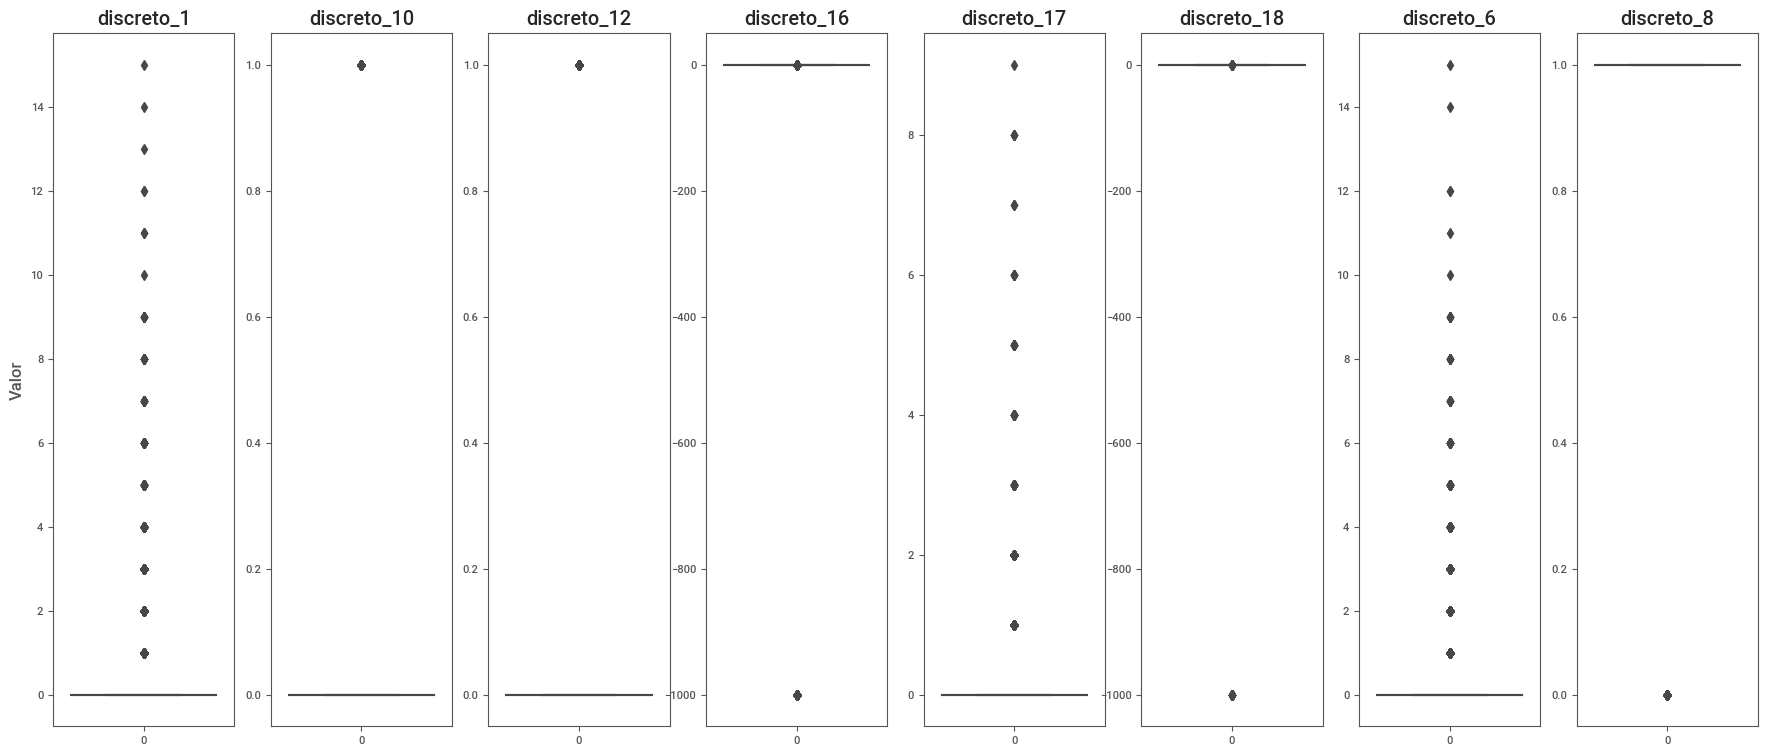

In [94]:
plt.subplot(1,8,1)
sns.boxplot(numerical_attributes['discreto_1']).set(title='discreto_1', ylabel="Valor")

plt.subplot(1,8,2)
sns.boxplot(numerical_attributes['discreto_10']).set(title='discreto_10')

plt.subplot(1,8,3)
sns.boxplot(numerical_attributes['discreto_12']).set(title='discreto_12')

plt.subplot(1,8,4)
sns.boxplot(numerical_attributes['discreto_16']).set(title='discreto_16')

plt.subplot(1,8,5)
sns.boxplot(numerical_attributes['discreto_17']).set(title='discreto_17')

plt.subplot(1,8,6)
sns.boxplot(numerical_attributes['discreto_18']).set(title='discreto_18')

plt.subplot(1,8,7)
sns.boxplot(numerical_attributes['discreto_6']).set(title='discreto_6')

plt.subplot(1,8,8)
sns.boxplot(numerical_attributes['discreto_8']).set(title='discreto_8');

print('Variáveis discretas afetadas pelos valores marcadores (-999)')

Variáveis discretas afetadas sem os valores marcadores (-999)


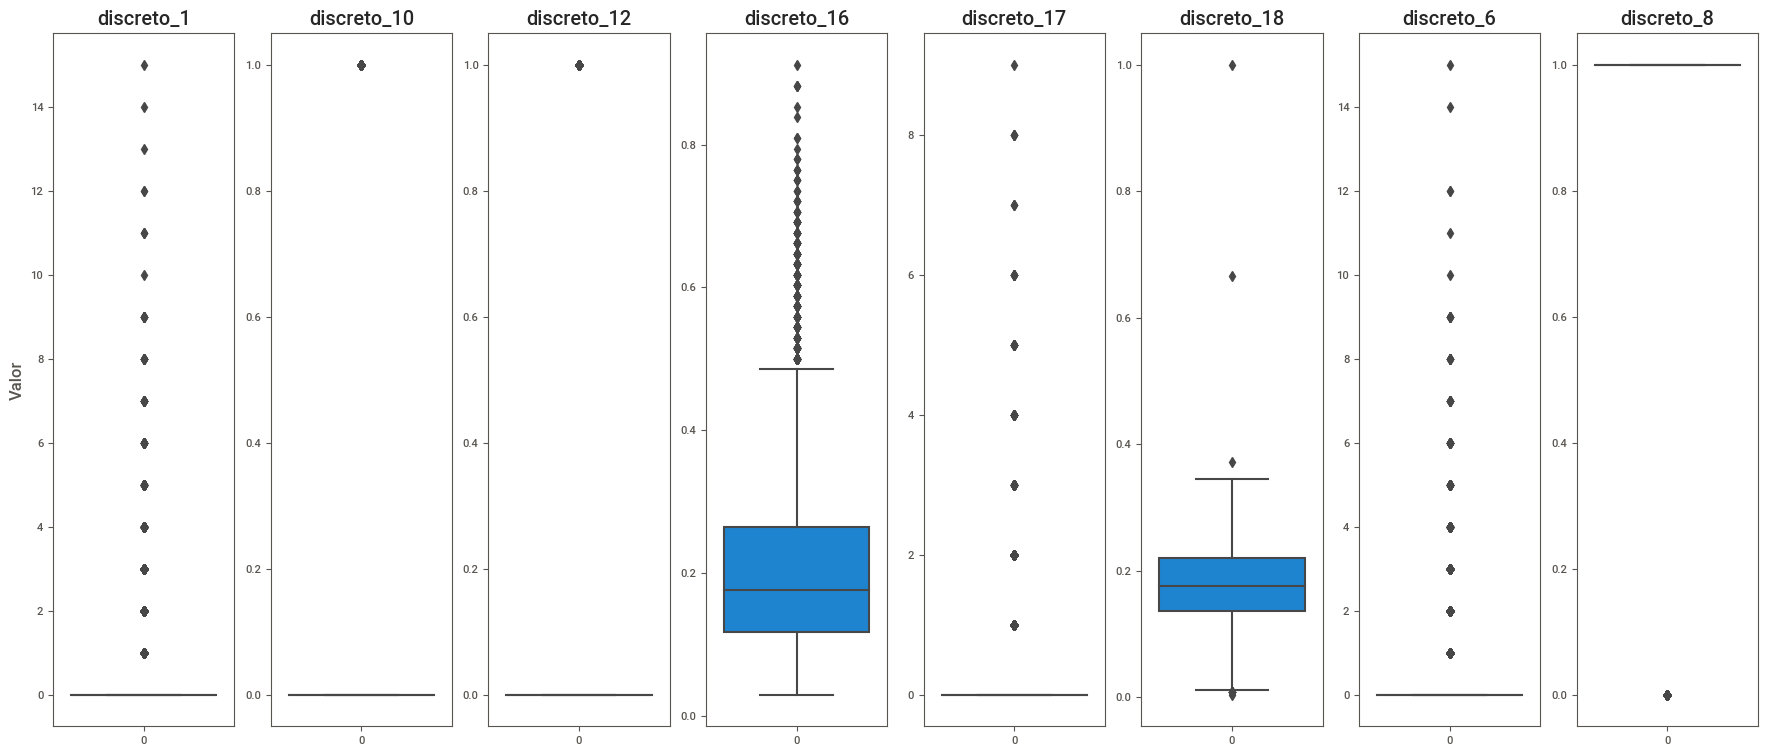

In [95]:
plt.subplot(1,8,1)
sns.boxplot(numerical_attributes[numerical_attributes['discreto_1'] > -1]['discreto_1']).set(title='discreto_1', ylabel="Valor")

plt.subplot(1,8,2)
sns.boxplot(numerical_attributes[numerical_attributes['discreto_10'] > -1]['discreto_10']).set(title='discreto_10')

plt.subplot(1,8,3)
sns.boxplot(numerical_attributes[numerical_attributes['discreto_12'] > -1]['discreto_12']).set(title='discreto_12')

plt.subplot(1,8,4)
sns.boxplot(numerical_attributes[numerical_attributes['discreto_16'] > -1]['discreto_16']).set(title='discreto_16')

plt.subplot(1,8,5)
sns.boxplot(numerical_attributes[numerical_attributes['discreto_17'] > -1]['discreto_17']).set(title='discreto_17')

plt.subplot(1,8,6)
sns.boxplot(numerical_attributes[numerical_attributes['discreto_18'] > -1]['discreto_18']).set(title='discreto_18')

plt.subplot(1,8,7)
sns.boxplot(numerical_attributes[numerical_attributes['discreto_6'] > -1]['discreto_6']).set(title='discreto_6')

plt.subplot(1,8,8)
sns.boxplot(numerical_attributes[numerical_attributes['discreto_8'] > -1]['discreto_8']).set(title='discreto_8');

print('Variáveis discretas afetadas sem os valores marcadores (-999)')

Verificando a variância das features


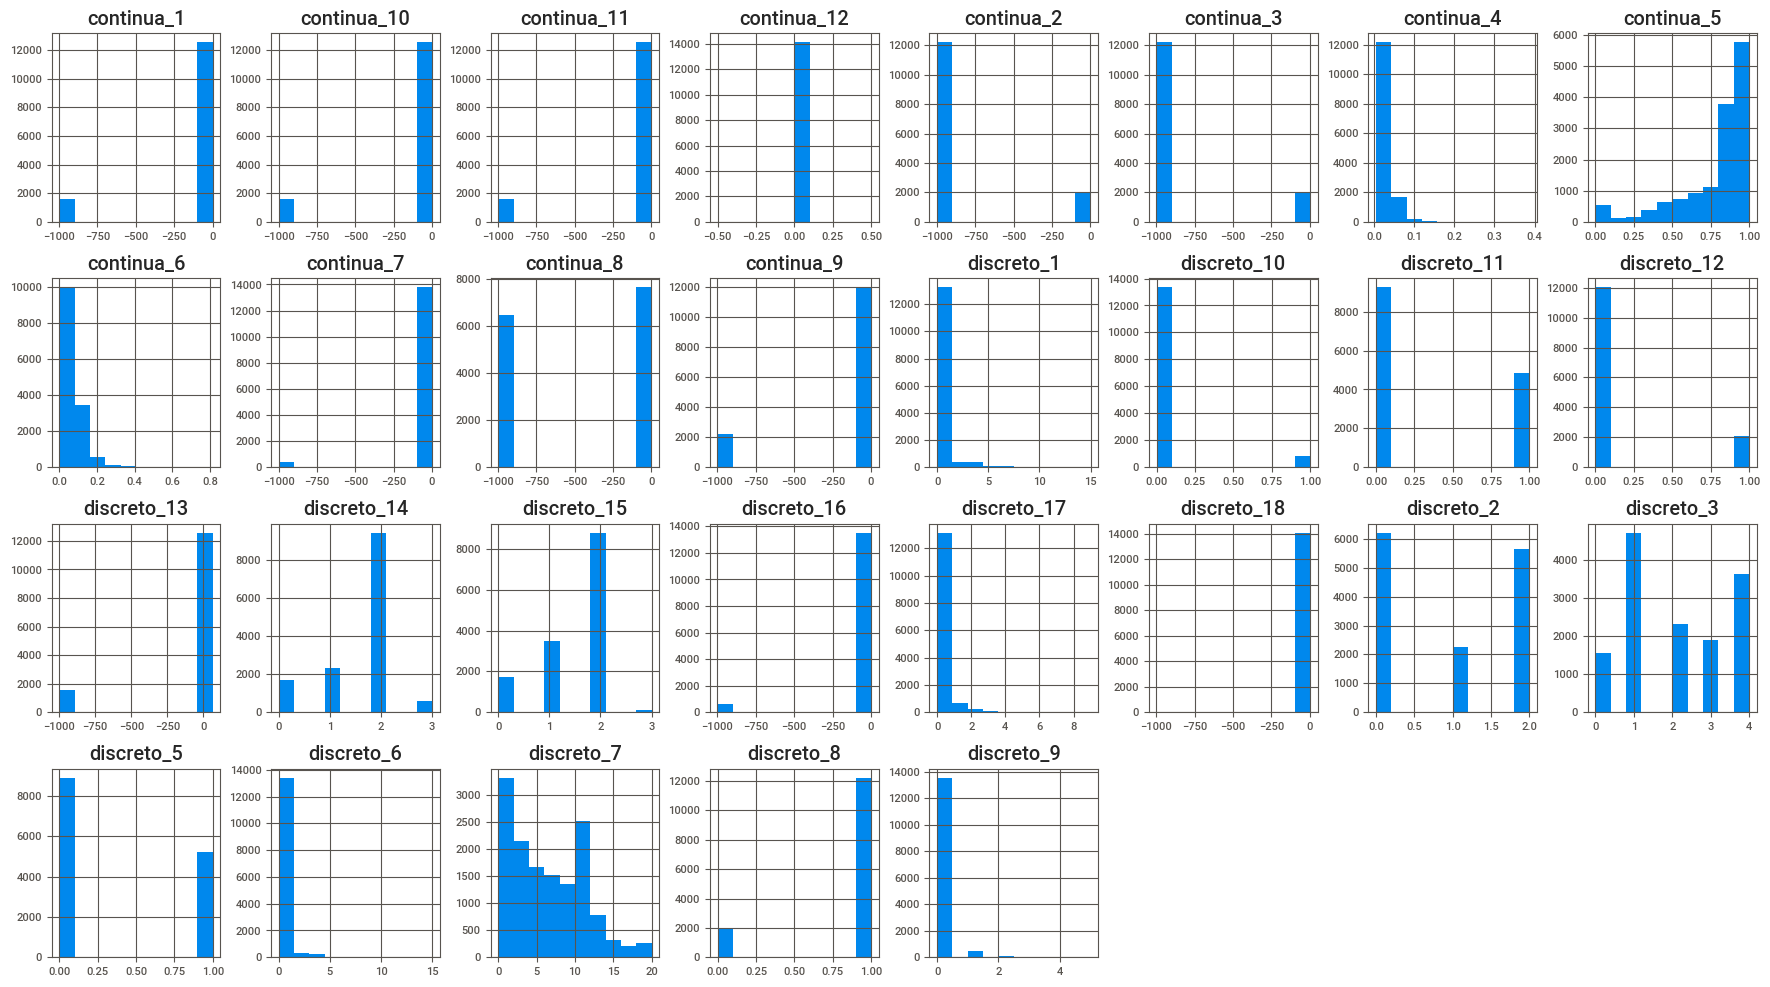

In [96]:
numerical_attributes.hist(figsize=(22,12),layout=(4,8));
print('Verificando a variância das features')

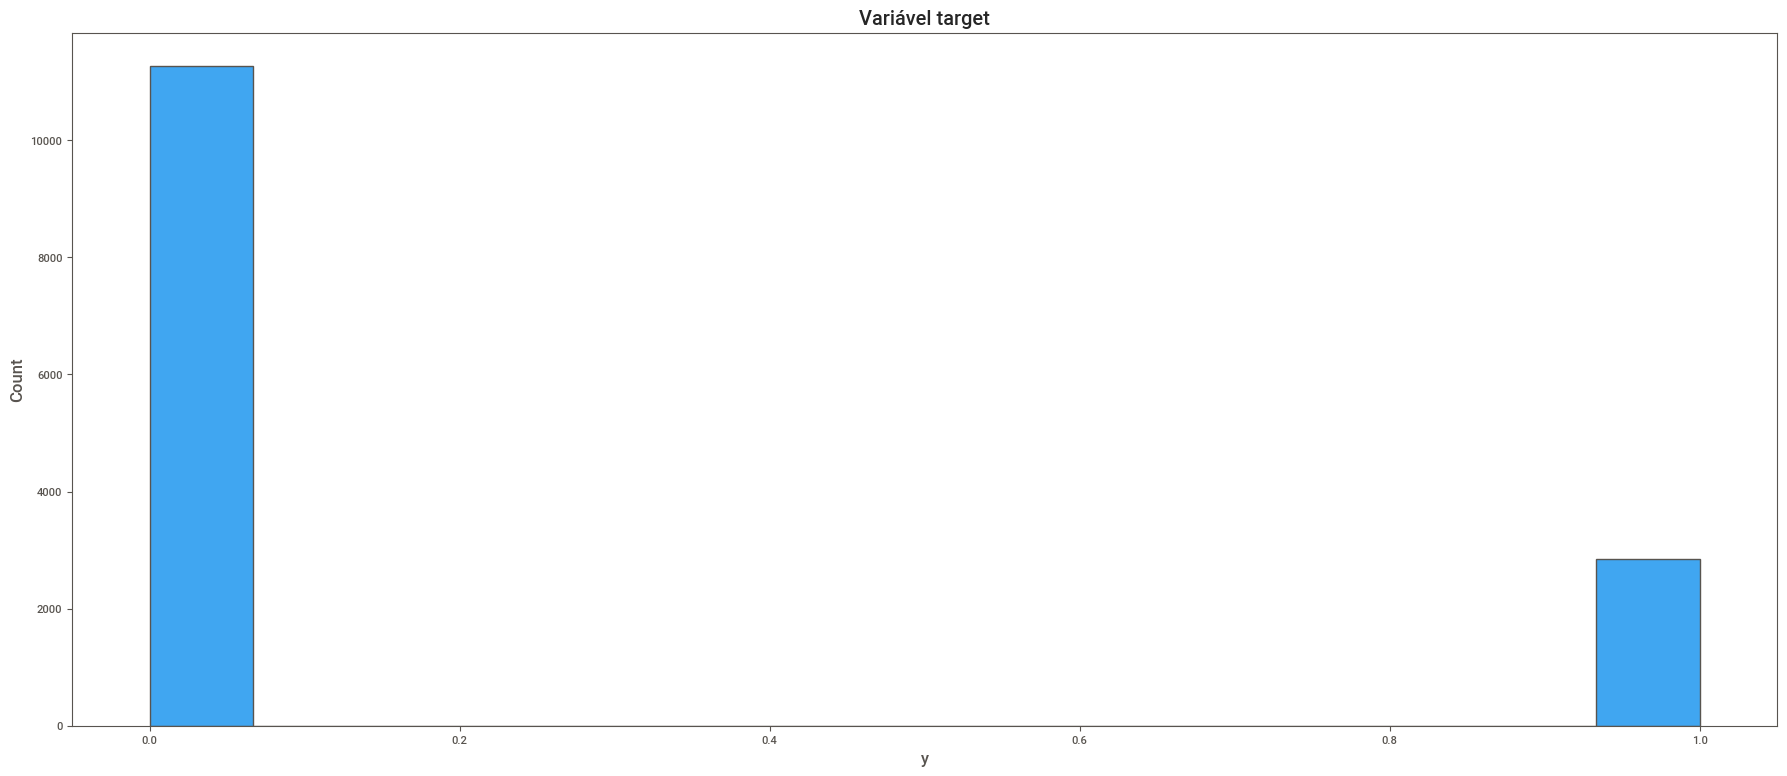

In [97]:
sns.histplot(df2.y).set(title="Variável target");


## 2.2. Análise Bivariada

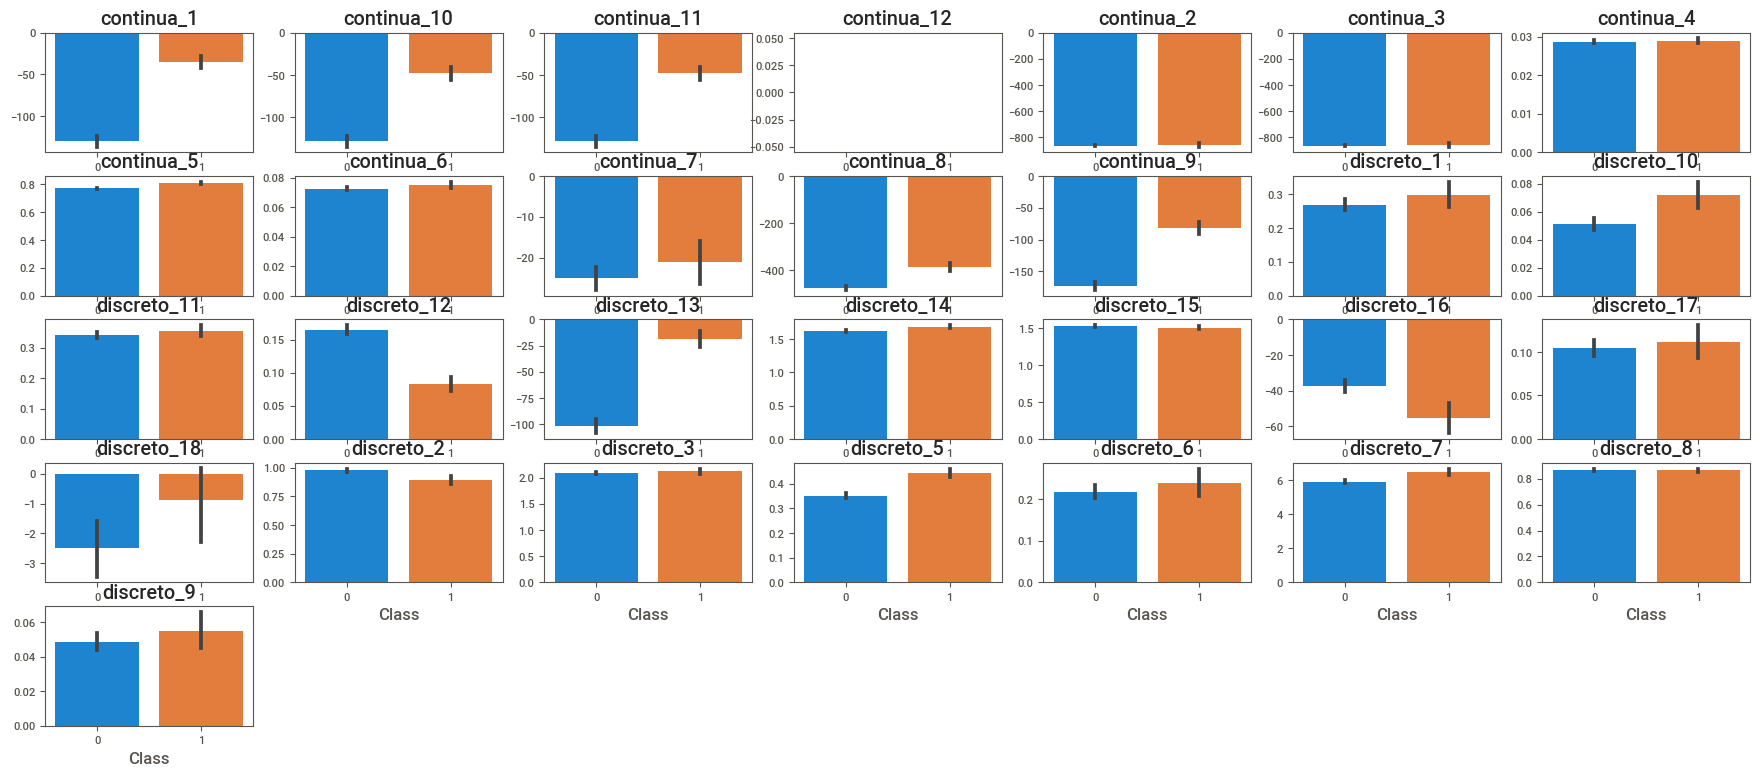

In [98]:
counter = 1
for col in numerical_attributes.columns:
    plt.subplot(5, 7, counter)
    sns.barplot(data=df2, y=col,  x="y").set(title=col, xlabel="Class", ylabel=None);
    counter += 1


## 2.3. Análise Multivariada

In [99]:
corr = numerical_attributes.corr().round(1)
corr

continua_1  continua_10  continua_11  continua_12  continua_2  continua_3  continua_4  continua_5  continua_6  continua_7  continua_8  continua_9  discreto_1  discreto_10  discreto_11  discreto_12  discreto_13  discreto_14  discreto_15  discreto_16  discreto_17  discreto_18  discreto_2  discreto_3  discreto_5  discreto_6  discreto_7  discreto_8  discreto_9
continua_1         1.00         0.70         0.70          NaN        0.10        0.10        0.00        0.00        0.00        0.00        0.30        0.60        0.10         0.00         0.10         0.00         0.80         0.60         0.60         0.20         0.00         0.00       -0.00        0.00        0.20        0.10       -0.00       -0.00        0.00
continua_10        0.70         1.00         1.00          NaN        0.10        0.10        0.00        0.00        0.00        0.00        0.40        0.80        0.10         0.00         0.10         0.00         0.90         0.70         0.70         0.20         0.10        -0.00       -0.00        0.00        0.20        0.10        0.00       -0.00        0.10
continua_11        0.70         1.00         1.00          NaN        0.10        0.10        0.00        0.00        0.00        0.00        0.40        0.80        0.10         0.00         0.10         0.00         0.90         0.70         0.70         0.20         0.10        -0.00       -0.00        0.00        0.20        0.10        0.00       -0.00        0.10
continua_12         NaN          NaN          NaN          NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
continua_2         0.10         0.10         0.10          NaN        1.00        1.00        0.00        0.00        0.00        0.00        0.10        0.10        0.80        -0.00         0.10        -0.10         0.10         0.10         0.10         0.00         0.50         0.00       -0.00       -0.00        0.40        0.70        0.00       -0.00        0.50
continua_3         0.10         0.10         0.10          NaN        1.00        1.00        0.00        0.00        0.00        0.00        0.10        0.10        0.80        -0.00         0.10        -0.10         0.10         0.10         0.10         0.00         0.50         0.00       -0.00       -0.00        0.40        0.70        0.00       -0.00        0.50
continua_4         0.00         0.00         0.00          NaN        0.00        0.00        1.00       -0.10        0.60        0.00        0.10        0.00        0.00         0.00         0.10        -0.00         0.00        -0.00        -0.00         0.00         0.00        -0.00        0.00       -0.00        0.10        0.00       -0.00       -0.00        0.00
continua_5         0.00         0.00         0.00          NaN        0.00        0.00       -0.10        1.00       -0.00        0.00       -0.00        0.00        0.00        -0.00        -0.00        -0.00         0.00        -0.00        -0.00         0.00         0.00         0.10       -0.00        0.00       -0.00       -0.00        0.20        0.00        0.00
continua_6         0.00         0.00         0.00          NaN        0.00        0.00        0.60       -0.00        1.00        0.00        0.00        0.00        0.00         0.00         0.10         0.00         0.00        -0.00        -0.00         0.00         0.00        -0.00        0.00       -0.00        0.00        0.00        0.10       -0.30        0.00
continua_7         0.00         0.00         0.00          NaN        0.00        0.00        0.00        0.00        0.00        1.00        0.00        0.10        0.00         0.00         0.00         0.00         0.00         0.00         0.00         0.00         0.00        -0.00      

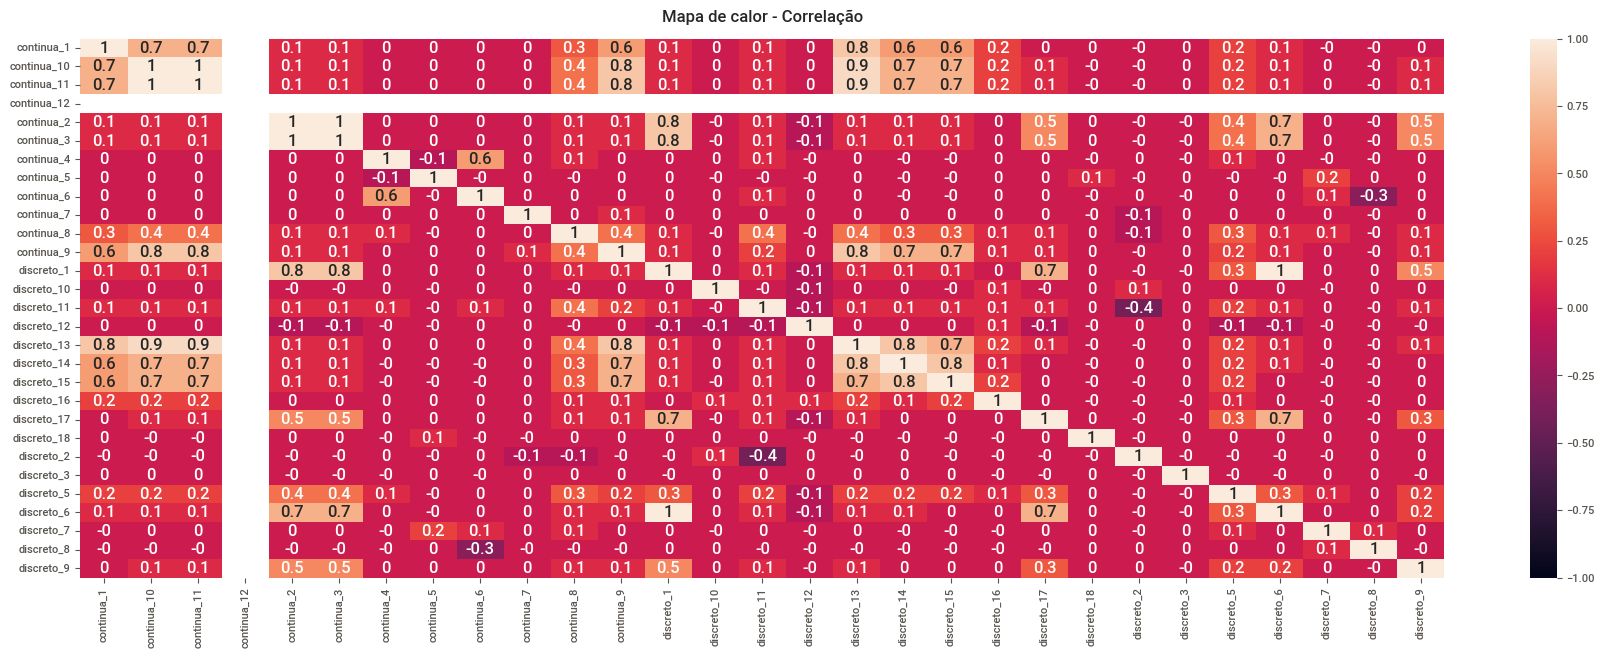

In [100]:
plt.figure(figsize=(22, 7))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title("Mapa de calor - Correlação", fontdict={"fontsize": 12}, pad=12);

# 3 - Feature selection

## 3.1. Filtragem de linhas

In [101]:
# num = ['continua_1', 'continua_10', 'continua_11', 'continua_12', 'continua_2',
#        'continua_3', 'continua_4', 'continua_5', 'continua_6', 'continua_7',
#        'continua_8', 'continua_9', 'discreto_1', 'discreto_10', 'discreto_11',
#        'discreto_12', 'discreto_13', 'discreto_14', 'discreto_15', 'discreto_16', 
#        'discreto_17', 'discreto_18', 'discreto_2', 'discreto_3', 'discreto_5', 
#        'discreto_6', 'discreto_7', 'discreto_8', 'discreto_9']

# # Substituindo valores -999 (faltantes?) pela mediana
# for col in num:
#     df2[col] = df2[col].apply(lambda x: df2[col].median() if x == -999 else x)

## 3.2. Filtragem de colunas

In [102]:
# # Exclusão das features com muitos valores -999 (faltantes?), acima de 80%
# # Exclusão das features com baixa variância
# # Exclusão das features altamente correlacionadas, acima de .8
# df3 = df2.drop(
#     columns=[
#         "continua_2",
#         "continua_12",
#         "continua_3",
#         "continua_10",
#         "discreto_13",
#         "discreto_1",
#         "continua_11",
#         "discreto_14",
#     ]
# )


# >>>>> --- Descartado por não apresentar o melhor resultado ---=== <<<<<<
# df3 = df2.drop(
#     columns=["continua_2","continua_12","continua_3","continua_10",
#         "discreto_13","discreto_1","continua_11","discreto_14",
#         "nominal_8","nominal_9","nominal_10","nominal_11",
#         "nominal_12","nominal_13","nominal_14","nominal_15",
#         "nominal_16","nominal_17","nominal_18","nominal_19",
#         "nominal_20","nominal_21","nominal_22","nominal_23",
#         "nominal_24","nominal_35","nominal_34","nominal_33",
#         "nominal_32","nominal_31","nominal_36",]
# )


# 4 - Data preparation

In [104]:
df3 = df2.copy()

# dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop(["id", "y"], axis=1), df3["y"], test_size=0.2, random_state=42
)

# ======================== PRÉ PROCESSAMENTO ===============================
# pipeline para pré-processamento das variáveis numéricas
num_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# pipeline para pré-processamento das variáveis categóricas
cat_transformer = Pipeline(steps=[("label encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

# Compondo os pré-processadores
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, list(df3.drop(columns=['id', 'y']).select_dtypes(include=["int32", "float32"]))),
        ("cat", cat_transformer, list(df3.select_dtypes(include=["category"]))),
    ]
)


# 5 - Modeling

## Logistic Regression

c:\Users\Usuário\repos\compass\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Usuário\repos\compass\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


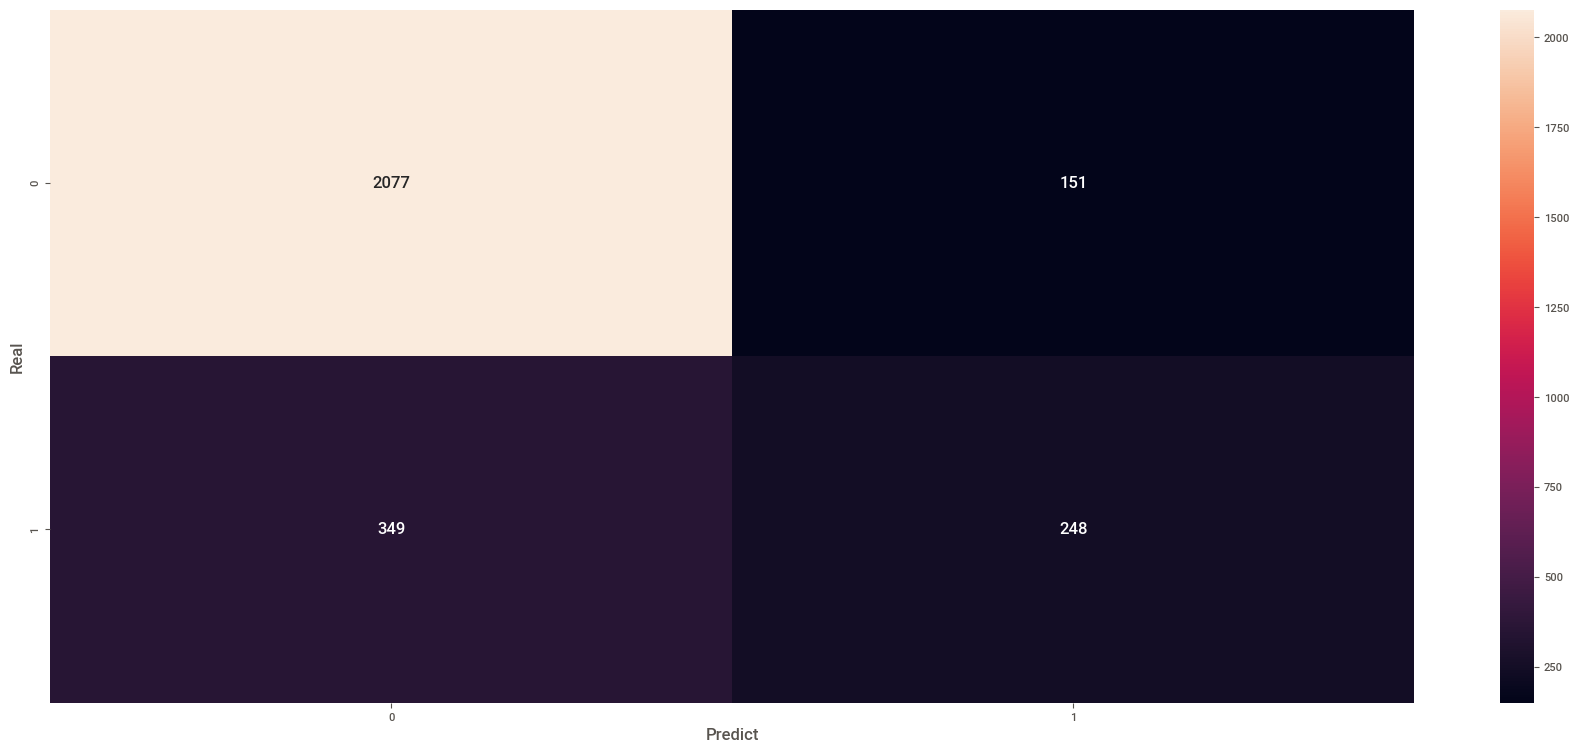

In [109]:
model_name = 'lr'
modelo = LogisticRegression()
parametros = { 
    "max_iter": [1, 5, 10],
    "penalty": ["l2", "l1"],
    "class_weight": ["balanced", None],
    'solver':['liblinear']
}

# O cross validation para descobrir os melhores parametros é realizado no dataset completo
best_params = tuning_hyperparams(preprocessor, modelo, model_name, parametros, df3.drop(["id", "y"], axis=1), df3["y"])

# Usando os melhores parâmetros do Cross validation
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "lr",
            LogisticRegression(
                class_weight    = best_params[model_name + '__' + "class_weight"],
                max_iter        = best_params[model_name + '__' + "max_iter"],
                penalty         = best_params[model_name + '__' + "penalty"],
                solver          = best_params[model_name + '__' + "solver"],
            ),
        ),
    ]
)

# treinando o modelo
model.fit(X_train, y_train)

# testando o modelo
y_pred = model.predict(X_test)

# Confusion matrix
confusion = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predict'])
sns.heatmap(confusion, annot=True, fmt='g');

In [52]:
lr_metrics_table = simple_metrics('Logistic Regression', y_test, y_pred)
lr_metrics_table

Model  Precision  Recall   F1  AUC
0  Logistic Regression       0.63    0.41 0.50 0.67

### 5.0.2. Class balancing

Oversampling

In [ ]:
# >>>>> --- Descartado por não apresentar o melhor resultado ---=== <<<<<<

# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=0)
# X_train, y_train = smote.fit_resample(X_train, y_train)


# >>>>> --- Descartado por não apresentar o melhor resultado ---=== <<<<<<

# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0, shrinkage=0.1)
# X_train, y_train = ros.fit_resample(X_train, y_train)

Undersampling

In [ ]:
# >>>>> --- Descartado por não apresentar o melhor resultado ---=== <<<<<< 

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# X_train, y_train = rus.fit_resample(X_train, y_train)


# # >>>>> --- Descartado por não apresentar o melhor resultado ---=== <<<<<<

# from imblearn.under_sampling import TomekLinks
# tl = TomekLinks()
# X_train, y_train = tl.fit_resample(X_train, y_train)

Mix Under/Oversampling

In [ ]:
print(X_train.shape)
print(y_train.shape)


In [ ]:
# >>>>> --- Implementado dentro da função de Cross Validation ---=== <<<<<<
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)

### 5.0.3. Data normalization

RobustScaler

In [ ]:
# >>>>> --- Descartado por não apresentar o melhor resultado ---=== <<<<<<

# rs = RobustScaler()
# rs.fit(X_train)
# X_train_norm = rs.transform(X_train)
# X_test_norm = rs.transform(X_test)

MinMaxScaler

In [ ]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train_norm = mms.transform(X_train)
X_test_norm = mms.transform(X_test)